# EXPLORATORY DATA ANALYSIS

In [31]:
#Downloading the important libraries

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [49]:
#Loading the dataset into a file named d1
d1=pd.read_csv('avocado.csv',parse_dates=["Date"])
d1.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [50]:
#Removing the index column named Unnamed:0
d1.drop('Unnamed: 0',inplace=True,axis=1)
d1.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [51]:
d1.shape

(18249, 13)

#There are18249 rows and 13 columns in this dataset

In [52]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   PLU_4046      18249 non-null  float64       
 4   PLU_4225      18249 non-null  float64       
 5   PLU_4770      18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [53]:
#There are no null values in this dataset
#date is in datetime format,type and region columns are in object datatype

In [54]:
#converting object datatype columns into integer using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=["type","region"]
for val in list1:
    d1[val]=le.fit_transform(d1[val].astype(str))

In [55]:
#Checking the datatypes of columns in d1
d1.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
PLU_4046               float64
PLU_4225               float64
PLU_4770               float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                     int32
year                     int64
region                   int32
dtype: object

In [56]:
#converting datetime datatype of Date into integer datatype by creating separate columns for date.(Year column is already present and date column is not import as harvesting is related to month)
d1["month"]=d1['Date'].dt.month
d1.drop('Date',axis=1,inplace=True)

In [57]:
d1.head()

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11


In [58]:
d1.isnull().sum()

AveragePrice    0
Total Volume    0
PLU_4046        0
PLU_4225        0
PLU_4770        0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
dtype: int64

#Therefore there are no null values in this dataset

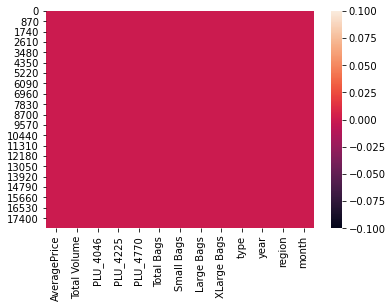

In [59]:
#Heat map representation to check for the presence of null values
sns.heatmap(d1.isnull())

No distraction in the lines shows there are no null values

In [60]:
d1.describe()

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000,12.000000


OBSERVATION
1)Description table gives an idea about total rows,minimum,maximum,mean,median,25%,75% and std deviation of each columns in our dataset.
2)There are 18249 rows
3)mean is greater than median for total volume,PLU_4770,XLarge bags so they are right skewed
4)median is greater than mean for PLU_4046,total bags and small bags so they are left skewed
5)There is large difference between 75% and maximum for small bags,XLarge bags and region.This shows the presents of outliers
6)Outliers must be treated to get a better analysis and a better accuracy

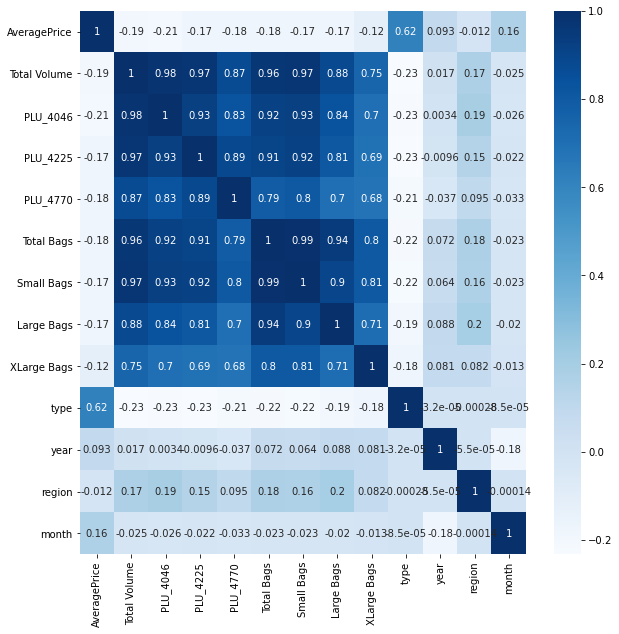

In [64]:
#Plotting the correlation map of columns
d1cor=d1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(d1cor,cmap='Blues',annot=True)

#Average price is having strong negative relation with region,XLarge bags,large bags,small bags,PLU columns and total volume
#Average price is having positive relation with month,yearand type

In [76]:
#Correlation map can be expressed in matrix form also
corr_matrix=d1.corr()
print(corr_matrix["AveragePrice"].sort_values(ascending=False))

AveragePrice    1.000000
type            0.615845
month           0.162409
year            0.093197
region         -0.011716
XLarge Bags    -0.117592
PLU_4225       -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
PLU_4770       -0.179446
Total Volume   -0.192752
PLU_4046       -0.208317
Name: AveragePrice, dtype: float64


In [73]:
collist=d1.columns.values
ncol=20
nrows=8

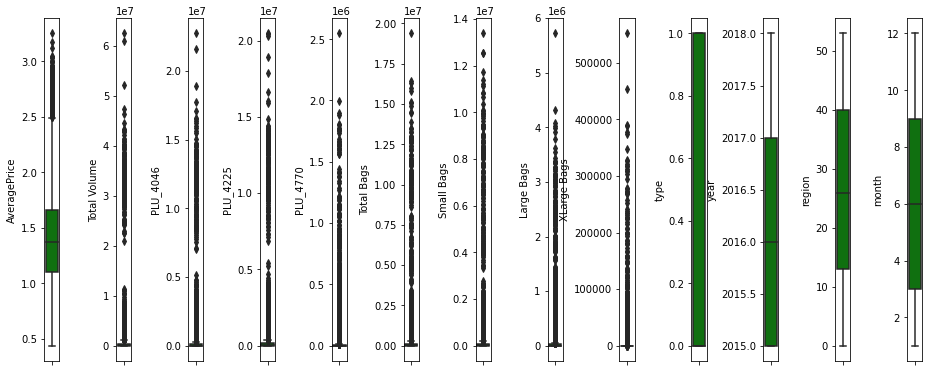

In [74]:
plt.figure(figsize=(ncol,2*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(d1[collist[i]],color='green',orient='v')
    plt.tight_layout()

#Here the black dots in the boxplot represents the presence of outliers.

# UNIVARIATE ANALYSIS

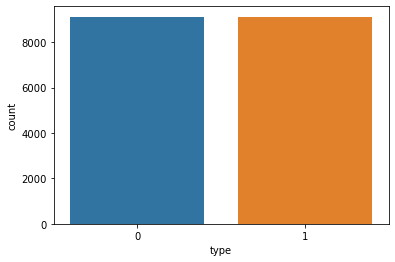

In [78]:
sns.countplot(d1["type"])

type 0 -conventional
type 1- organic

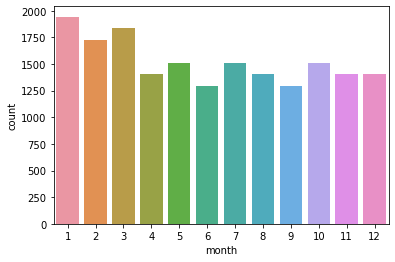

In [82]:
sns.countplot(d1["month"])

#As per this count plot maximum no.of avocados harvested is in month of January and March
#lowest harvested month is June and september

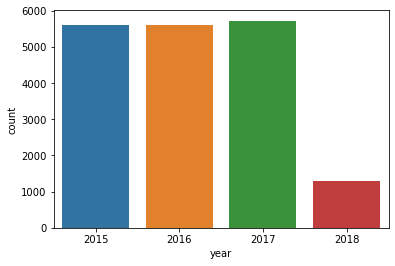

In [79]:
sns.countplot(d1["year"])

#total quantity of avocados harvested in year 2015,2016,2017 are almost same 
#quantity in 2018 is showing very much less because our dataset contains datas only from first three months

# BIVARIATE ANALYSIS

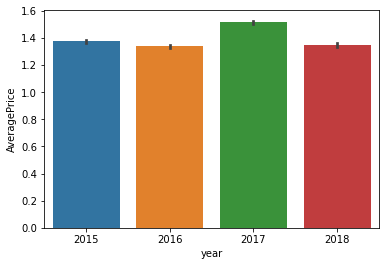

In [84]:
sns.barplot(x=d1['year'],y=d1['AveragePrice'])

#Average price was higher in the year 2017 and is approximately 1.5
#Average price was lower in the year 2016 and 2018 and is nearly 1.3

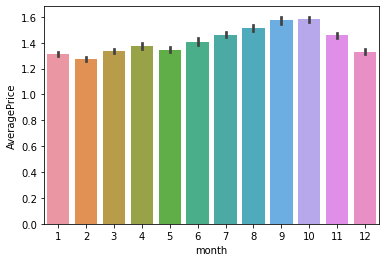

In [85]:
sns.barplot(x=d1['month'],y=d1['AveragePrice'])

#Average price was maximum in the month of september and october and is almost 1.6
#Average price is lowest in the month of  February and December and is nearly 1.3

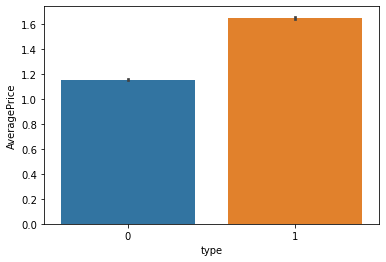

In [94]:
sns.barplot(x=d1['type'],y=d1['AveragePrice'])

#This shows that average price is maximum for organic ones and is about 1.6
#average is price is lower for conventional ones and is below 1.2

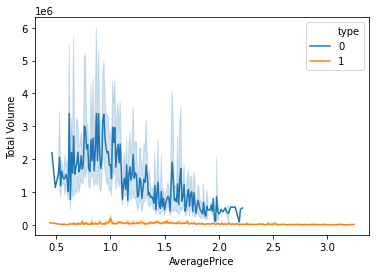

In [96]:
f, ax=plt.subplots(figsize=(6,4))
sns.lineplot(x='AveragePrice', y='Total Volume',hue='type',data=d1)

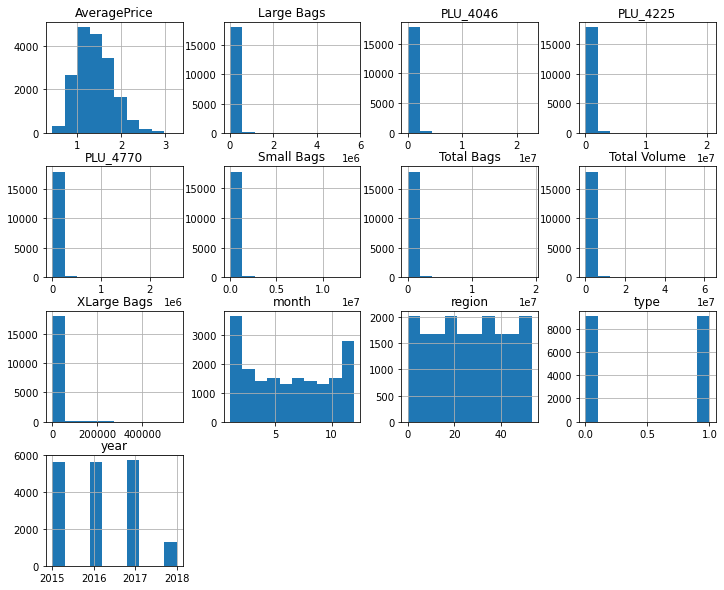

In [101]:
d1.hist(figsize=(12,10))
plt.show()

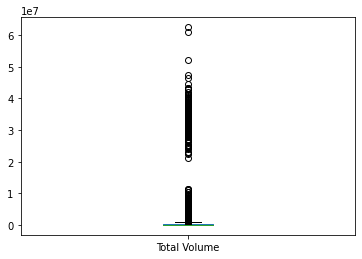

In [103]:
d1["Total Volume"].plot.box()

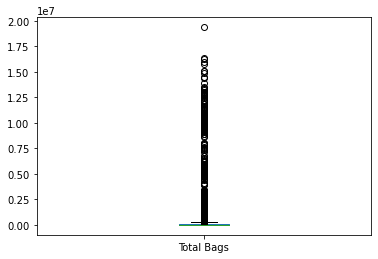

In [104]:
d1["Total Bags"].plot.box()

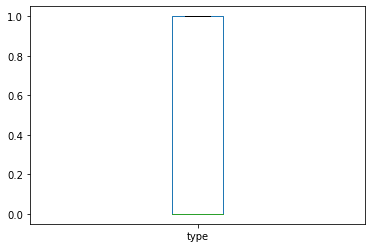

In [105]:
d1["type"].plot.box()

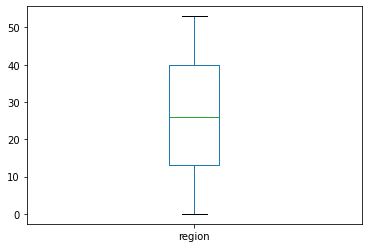

In [106]:
d1["region"].plot.box()

In [75]:
#Checking the skewness
d1.skew()

AveragePrice     0.580303
Total Volume     9.007687
PLU_4046         8.648220
PLU_4225         8.942466
PLU_4770        10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
month            0.106617
dtype: float64

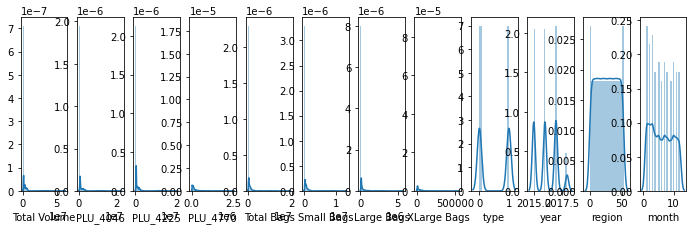

In [107]:
plt.figure(figsize=(20,30))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(d1[collist[i]])

#We can see that all columns except type,year,region and month are left skewed

In [108]:
#skewness can be removed using yeo_johnson method
from sklearn.preprocessing import power_transform
d1=pd.DataFrame(power_transform(d1,method='yeo-johnson'),columns=d1.columns)
d1.skew()

AveragePrice    0.005596
Total Volume    0.011171
PLU_4046       -0.022679
PLU_4225       -0.017740
PLU_4770        0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
type            0.000329
year            0.213156
region         -0.261443
month          -0.146584
dtype: float64

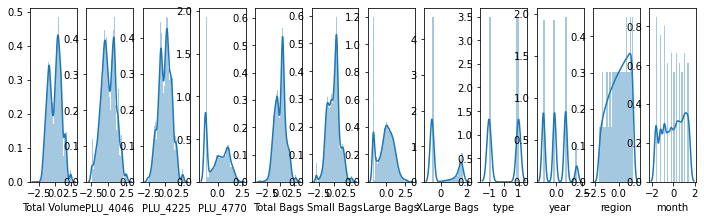

In [109]:
plt.figure(figsize=(20,30))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(d1[collist[i]])

#Skewness graph after removal of skews

In [112]:
#Implementing Zscore to remove the presence of outliers
from scipy.stats import zscore
columns=['Total Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'month']
for i in range(len(columns)):
    d1[columns[i]]=zscore(d1[columns[i]])
    for j in range(len(d1[columns[i]])):
        if d1[columns[i]][j]>3 or d1[columns[i]][j]<-3:
            d1[columns[i]].replace(d1[columns[i]][j],d1[columns[i]].median(),inplace=True)
            d1[columns[i]]=np.cbrt((d1[columns[i]]))

In [113]:
#Assigning x and y values to train the data
x=d1[columns]
y=d1[["AveragePrice"]]

In [114]:
#Checking the shape of assigned x and y
print(x.shape)
print(y.shape)

(18249, 12)
(18249, 1)


In [115]:
#Checking whether any null values are present
d1.isnull().values.any()

False

In [116]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.52745148, -0.65861896,  0.71900088, ..., -1.22187884,
        -2.01155231,  1.49434741],
       [-0.63106834, -0.77686953,  0.651928  , ..., -1.22187884,
        -2.01155231,  1.49434741],
       [ 0.56334673, -0.73194656,  0.89463751, ..., -1.22187884,
        -2.01155231,  1.49434741],
       ...,
       [-1.04201742, -0.61983119, -1.04123679, ...,  1.96856389,
         1.54383806, -1.64204669],
       [-1.00942161, -0.55028196, -1.01336338, ...,  1.96856389,
         1.54383806, -1.64204669],
       [-0.99342343, -0.36790819, -1.04675489, ...,  1.96856389,
         1.54383806, -1.64204669]])

# MODEL PREDICTION

In [117]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [118]:
max_r_score=0
for r_state in range(30,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 62 is 0.5426187114824554


In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=62)

In [120]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14599, 12)
(3650, 12)
(14599, 1)
(3650, 1)


In [121]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn .linear_model import Lasso,Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [122]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('******************************************************************************')
    print('\n')

score of LinearRegression() is: 0.5173686598424999
Error:
Mean absolute error: 0.5385405788039548
Mean squared error: 0.4616609143617122
Root mean squared error: 0.6794563373475239
r2_score: 0.5426187114824554
******************************************************************************


score of DecisionTreeRegressor() is: 1.0
Error:
Mean absolute error: 0.2935845544520971
Mean squared error: 0.19103329899096247
Root mean squared error: 0.43707356244797335
r2_score: 0.8107375917602909
******************************************************************************


score of KNeighborsRegressor() is: 0.9176718410411137
Error:
Mean absolute error: 0.25776665385012004
Mean squared error: 0.12893787831449696
Root mean squared error: 0.35907920896996665
r2_score: 0.8722573839638568
******************************************************************************


score of SVR() is: 0.77237405677527
Error:
Mean absolute error: 0.36162045284354655
Mean squared error: 0.23261069935504577
Root 

In [125]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=1000,random_state=51)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('mean absolute error:',mean_absolute_error(y_test,predrf))
print('mean squared error:',mean_squared_error(y_test,predrf))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))
print(r2_score(y_test,predrf))

mean absolute error: 0.21930333620787756
mean squared error: 0.0934274420158731
root mean squared error: 0.30565902901087855
0.9074386362744201


In [126]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print('mean absolute error:',mean_absolute_error(y_test,ad_pred))
print('mean squared error:',mean_squared_error(y_test,ad_pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,ad_pred)))
print(r2_score(y_test,ad_pred))

mean absolute error: 0.4995358767457888
mean squared error: 0.3849322041643118
root mean squared error: 0.6204290484530135
0.6186361416885565


In [127]:
from sklearn.model_selection import cross_val_score
rfscores=cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[-0.09464792  0.46350696  0.68131651  0.15922181  0.03521558]
0.24892258850886875 0.2845236602331523


In [128]:
#selecting random forest regressor as best model and saving it as pickle file
import joblib
joblib.dump(rf,'rf_avocado.pkl')

['rf_avocado.pkl']